In [1]:
from Bio.PDB import PDBList
from Bio.SeqUtils import seq1
from Bio import SeqIO

import os

from helpers.helper import get_cath
import random

import json
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import copy



In [2]:
cath = get_cath()

In [3]:
with open('../data/cath/cath_domain_boundaries.json', 'w') as f:
    json.dump(cath, f)

In [4]:
seed = 2023

In [5]:
random.seed(seed)

In [6]:
def number_of_domains(chain):
	return len(cath[chain[:4]][chain[-1]])

In [7]:
domain_chains_dict = {
    
}

lengths = {}
for code, info in cath.items():
    chains = info.keys()
    for chain in chains:
        domains = cath[code][chain]
        no_of_domains = len(domains)
        lengths[str(no_of_domains)] = lengths.get(str(no_of_domains), 0) + 1

for n in lengths.keys():
    domain_chains_dict[n] = []

for code, info in cath.items():
    chains = info.keys()
    for chain in chains:
        domains = cath[code][chain]
        no_of_domains = len(domains)
        domain_chains_dict[str(no_of_domains)].append(f'{code}:{chain}')

random_sample = {}
for size, chains in domain_chains_dict.items():
    x = len(chains)
    if size in ['2', '3']:
        random_sample[size] = random.Random(seed).sample(chains, min(20000, x))
    else:
        random_sample[size] = random.Random(seed).sample(chains, min(15000, x)) # was 7000

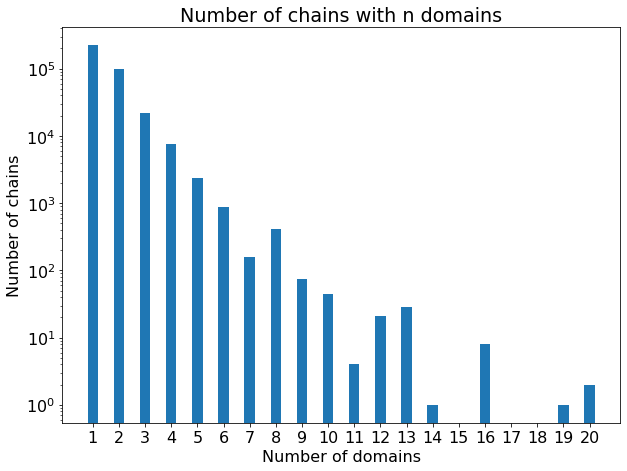

Chains with 1 domains: 222168
Chains with 2 domains: 99666
Chains with 3 domains: 21828
Chains with 4 domains: 7526
Chains with 8 domains: 419
Chains with 7 domains: 160
Chains with 6 domains: 863
Chains with 5 domains: 2338
Chains with 10 domains: 44
Chains with 9 domains: 75
Chains with 12 domains: 21
Chains with 13 domains: 29
Chains with 11 domains: 4
Chains with 20 domains: 2
Chains with 19 domains: 1
Chains with 16 domains: 8
Chains with 14 domains: 1


In [8]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

domains = [str(i) for i in range(1,21)]
size = [len(domain_chains_dict.get(str(i),[] )) for i in range(1,21)]

fig = plt.figure(figsize = (10, 16))
ax = fig.add_subplot(2, 1, 1)
# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
ax.set_yscale('log')
plt.title("Number of chains with n domains")
plt.show()
fig.savefig("../data/vis/before_strat_sampling.pdf", bbox_inches='tight')
for k in [int(x) for x in domain_chains_dict.keys()]:
    print(f"Chains with {k} domains: {len(domain_chains_dict[str(k)])}")

In [90]:
lengths
lengths_tuples = [(int(dom), size) for dom, size in lengths.items()]
lengths_tuples.sort(key=lambda x : x[0])

In [93]:
print(lengths_tuples)
five_or_more = sum([lengths_tuples[i][1] for i in range(4,len(lengths_tuples))])
five_or_more

[(1, 222168), (2, 99666), (3, 21828), (4, 7526), (5, 2338), (6, 863), (7, 160), (8, 419), (9, 75), (10, 44), (11, 4), (12, 21), (13, 29), (14, 1), (16, 8), (19, 1), (20, 2)]


3965

In [10]:
random_sample_tuples = []
for k, v in random_sample.items():
	random_sample_tuples.append((int(k), v))

random_sample_tuples.sort(key=lambda x: x[0])

In [11]:
lens = [len(x[1]) for x in random_sample_tuples]
lens_gt5 = sum(lens[5:])
total = sum(lens)
total

66491

In [12]:
random_sample_list = []
for k, v in random_sample_tuples:
	for chain in v:
		random_sample_list.append(chain)


In [13]:
len(random_sample_list)

66491

In [14]:
lens

[15000, 20000, 20000, 7526, 2338, 863, 160, 419, 75, 44, 4, 21, 29, 1, 8, 1, 2]

In [15]:
sum(lens)

66491

In [16]:
lens_gt5

1627

In [17]:
# with open(f"../data/pdb/new_iid/list_extra_2and3.txt", "w") as f:
# 	for (k, v) in random_sample_tuples:
# 		if k == 2 or k == 3:
# 				for pdb_code in v:
# 					if not os.path.isfile(f'../data/pdb/new_iid/{pdb_code[:4]}.pdb'):
# 						code = pdb_code[:4]
# 						f.write(code + ',')

In [18]:
# with open(f"../data/pdb/new_iid/list_extra_2and3.txt", "r") as f:
# 	line = f.readlines()[0]
# 	codes = line.split(',')
# 	print(len(codes))

In [19]:
# count how many new chains for 1 domain proteins are there from increasing the random sample size
# counter = 0
# for (k, v) in random_sample_tuples:
# 		if k == 1:
# 			for pdb_code in v:
# 				if not os.path.isfile(f'../data/pdb/new_iid/{pdb_code[:4]}.pdb'):
# 					counter += 1
# counter

In [20]:
# with open(f"../data/pdb/new_iid/list_extra_1.txt", "w") as f:
# 	for (k, v) in random_sample_tuples:
# 		if k == 1:
# 				for pdb_code in v:
# 					if not os.path.isfile(f'../data/pdb/new_iid/{pdb_code[:4]}.pdb'):
# 						code = pdb_code[:4]
# 						f.write(code + ',')

In [21]:
files_not_downloaded = []
# Set the directory path
dir_path = "../data/pdb/new_iid"

# Get the list of files in the directory
file_list = os.listdir(dir_path)

counter = 0
for _, chains in random_sample_tuples:
	for chain in chains:
		pdb_filename = f"{dir_path}/{chain[:4]}.pdb"
		chain_id = chain[-1]
		if not os.path.isfile(pdb_filename):
			files_not_downloaded.append(chain)
		counter += 1
		if (counter + 1) % 2000 == 0:
			print(f"[{counter + 1}/{31965}]")
print(f"[{counter + 1}/{31965+1}]")

files_not_downloaded

[2000/31965]
[4000/31965]
[6000/31965]
[8000/31965]
[10000/31965]
[12000/31965]
[14000/31965]
[16000/31965]
[18000/31965]
[20000/31965]
[22000/31965]
[24000/31965]
[26000/31965]
[28000/31965]
[30000/31965]
[32000/31965]
[34000/31965]
[36000/31965]
[38000/31965]
[40000/31965]
[42000/31965]
[44000/31965]
[46000/31965]
[48000/31965]
[50000/31965]
[52000/31965]
[54000/31965]
[56000/31965]
[58000/31965]
[60000/31965]
[62000/31965]
[64000/31965]
[66000/31965]
[66492/31966]


['1bos:L',
 '4dcb:A',
 '1bos:R',
 '6cde:6',
 '6cdi:l',
 '3whe:L',
 '3whe:4',
 '6g8h:D',
 '3whe:N',
 '6g8h:A',
 '3whe:H',
 '3whe:K',
 '3whe:1',
 '6cde:C',
 '6cdi:d',
 '6cdi:2',
 '6cde:2',
 '6cdi:C',
 '6cde:c',
 '3t3f:A',
 '6enc:A',
 '5tb9:A',
 '3oyg:A',
 '3b96:A',
 '1p2z:A',
 '6i11:A',
 '5dqg:A',
 '1jky:A',
 '5w6v:A',
 '7ics:A',
 '2brk:A',
 '3fax:A',
 '5kg6:A',
 '2fo0:A',
 '2wrm:A',
 '3ae7:A',
 '2ebh:X',
 '4hmc:A',
 '2p6u:A',
 '3ohm:B',
 '3taq:A',
 '2au3:A',
 '3efc:A',
 '2yd0:A',
 '3fzm:A',
 '5zza:A',
 '6bv3:A',
 '1y56:A',
 '4eyi:B',
 '5xab:A',
 '3ae2:A',
 '5kg3:A',
 '5kt4:A',
 '1qqm:A',
 '1dmr:A',
 '6eyk:A',
 '4ric:B',
 '1t5h:X',
 '1tk5:A',
 '5i23:A',
 '4rq6:A',
 '5uop:A',
 '2nub:A',
 '5l1l:A',
 '6cub:A',
 '3lwm:A',
 '2r59:A',
 '3pnc:A',
 '6ipm:A',
 '3tsu:A',
 '3vr5:C',
 '1nug:A',
 '2qw0:X',
 '4ect:A',
 '4dle:A',
 '2zkm:X',
 '2v6o:A',
 '4b9t:A',
 '2ii2:A',
 '1zqg:A',
 '4rt2:A',
 '1mdf:A',
 '5tws:A',
 '2gy5:A',
 '1axn:A',
 '3khr:B',
 '5eoz:A',
 '2hry:A',
 '4bwm:A',
 '2zxr:A',
 '7icf:A',

In [22]:
print("Total chains before:", len(random_sample_list))
for f in files_not_downloaded:
	random_sample_list.remove(f)
print("Total chains after removing those that were not downloaded:", len(random_sample_list))


Total chains before: 66491
Total chains after removing those that were not downloaded: 66291


In [23]:
# for elt in random_sample_list:
# 	if elt[:4] == '1bos':
# 		print(elt)

In [24]:
len(set(random_sample_list))

66291

In [25]:
chain_to_seq = {}
chain_not_in_pdb = []
dir_path = "../data/pdb/new_iid/"


counter = 0
for chain in random_sample_list:
    pdb_filename = f"../data/pdb/new_iid/{chain[:4]}.pdb"
    chain_id = chain[-1]
    with open(pdb_filename, "r") as pdb_file:
        pdb_chains = {record.id: record.seq for record in SeqIO.parse(pdb_filename, 'pdb-seqres')}
        seq = None
        for key in pdb_chains.keys():
            if key[-1] == chain[-1]:
                seq = pdb_chains[key]
                chain_to_seq[chain] = str(seq)
        if not seq:
            chain_not_in_pdb.append(chain)
    counter += 1
    if (counter) % 2000 == 0:
        print(f"[{counter}/{len(random_sample_list)}]")
print(f"[{counter}/{len(random_sample_list)}]") 



[2000/66291]
[4000/66291]
[6000/66291]
[8000/66291]
[10000/66291]
[12000/66291]
[14000/66291]
[16000/66291]
[18000/66291]
[20000/66291]
[22000/66291]
[24000/66291]
[26000/66291]
[28000/66291]
[30000/66291]
[32000/66291]
[34000/66291]
[36000/66291]
[38000/66291]
[40000/66291]
[42000/66291]
[44000/66291]
[46000/66291]
[48000/66291]
[50000/66291]
[52000/66291]
[54000/66291]
[56000/66291]
[58000/66291]
[60000/66291]
[62000/66291]
[64000/66291]
[66000/66291]
[66291/66291]


In [26]:
assert len(chain_to_seq) + len(chain_not_in_pdb) == len(random_sample_list)

In [27]:
print("Total chains before:", len(random_sample_list))
for f in chain_not_in_pdb:
	random_sample_list.remove(f)
print("Total chains after removing those that a chain wasn't found:", len(random_sample_list))

Total chains before: 66291
Total chains after removing those that a chain wasn't found: 66263


In [28]:
with open('../data/cath/iid/chains_to_seq.json', 'w') as fp:
    json.dump(chain_to_seq, fp)

In [29]:
# remove sequences of length > 2000
tmp = copy.deepcopy(chain_to_seq)
print("Number of chains before:", len(chain_to_seq))
for chain, seq in tmp.items():
	if len(seq) > 2000:
		del chain_to_seq[chain]
print("Number of chains after removing > 2000:", len(chain_to_seq))


Number of chains before: 66263
Number of chains after removing > 2000: 66219


In [30]:
# write them to a fasta file for mmseqs

with open('../data/cath/iid/ALL.fasta', 'w')as f:
	for k, v in chain_to_seq.items():
		f.write('>' + k + '\n' + v + '\n')


In [31]:
lefts = []
rights = []
with open('../data/cath/iid/mmseqs/clusterRes2_cluster.tsv', 'r') as f:
	for line in f.readlines():
		line = line.split('	')
		left = line[0]
		right = line[1]
		lefts.append(left)
		rights.append(right)

In [32]:
iid_chains = sorted(list(set(lefts)))

In [33]:
# remove non iid chains
print("Number of chains before:", len(chain_to_seq))
tmp = copy.deepcopy(chain_to_seq)
chain_to_seq = {}
for chain in iid_chains:
    chain_to_seq[chain] = tmp[chain]
print("Number of chains after removing non iid:", len(chain_to_seq))

Number of chains before: 66219
Number of chains after removing non iid: 8497


In [34]:
num_domains_iid = {}
for chain in iid_chains:
	no = number_of_domains(chain)
	if no in num_domains_iid.keys():
		num_domains_iid[no].append(chain)
	else:
		num_domains_iid[no] = [chain]

In [35]:
for no, chains in num_domains_iid.items():
	print(no, len(chains))

1 3953
3 1198
2 2726
4 396
8 14
6 44
5 137
7 19
10 5
13 1
11 1
9 2
12 1


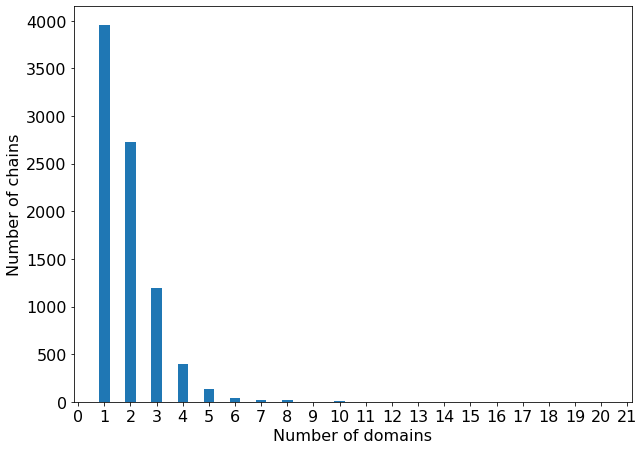

Chains with 1 domains: 3953
Chains with 3 domains: 1198
Chains with 2 domains: 2726
Chains with 4 domains: 396
Chains with 8 domains: 14
Chains with 6 domains: 44
Chains with 5 domains: 137
Chains with 7 domains: 19
Chains with 10 domains: 5
Chains with 13 domains: 1
Chains with 11 domains: 1
Chains with 9 domains: 2
Chains with 12 domains: 1


In [51]:
import matplotlib.ticker as mticker
domains = [i for i in range(1,21)]
size = [len(num_domains_iid.get(i,[])) for i in range(1,21)]

fig = plt.figure(figsize = (10, 16))
ax = fig.add_subplot(2, 1, 1)

# creating the bar plot
plt.bar(domains, size, width = 0.4)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
ax.set_yscale('log')

plt.title("")
plt.show()
fig.savefig("../data/vis/after_strat_sampling_and_iid.pdf", bbox_inches='tight')

for k in [int(x) for x in num_domains_iid.keys()]:
    print(f"Chains with {k} domains: {len(num_domains_iid[k])}")

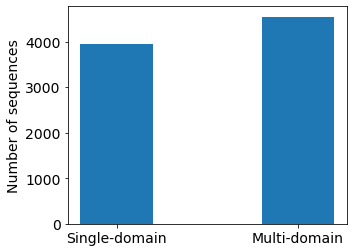

Chains with 1 domains: 3953
Chains with > 1 domains: 4544


In [112]:
n = 2

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)


# domains = [f"{str(i)}" for i in range(1,n)]
domains = ['Single-domain', 'Multi-domain']
size = [len(num_domains_iid.get(i,[] )) for i in range(1,n)]

more_than_n = sum([len(num_domains_iid.get(i,[] )) for i in range(n,21)])

# domains.append('> 2')
size.append(more_than_n)

fig = plt.figure(figsize = (5, 4))
# plt.title("Number of chains with n domains after processing")

# creating the bar plot
plt.bar(domains, size, width = 0.4)

# plt.xlabel("Number of domains")
plt.ylabel("Number of sequences")
plt.show()
fig.savefig("../data/vis/after_strat_sampling_and_iid_clear.pdf", bbox_inches='tight')

for k in range(1, n):
    try:
        print(f"Chains with {k} domains: {len(num_domains_iid[k])}")
    except KeyError:
        continue

print(f"Chains with > {n-1} domains: {more_than_n}")

In [ ]:
# # this is as of 4 March after noticing that my model can't predict well single domain boundaries
# new_num_domains_iid = {}

# for num, chains in num_domains_iid.items():
#     if num == 1:
#         new_num_domains_iid[num] = random.Random(seed).sample(chains, len(chains))
#     if num > 1:
#         new_num_domains_iid[num] = random.Random(seed).sample(chains, (len(chains) * 6) // 10 )

# n = 3
# domains = [str(i) for i in range(1,n)]
# size = [len(new_num_domains_iid.get(i,[] )) for i in range(1,n)]

# more_than_n = sum([len(new_num_domains_iid.get(i,[] )) for i in range(n,21)])

# domains.append('> 5')
# size.append(more_than_n)

# fig = plt.figure(figsize = (14, 13))

# # creating the bar plot
# plt.bar(domains, size, width = 0.4)

# plt.xlabel("Number of domains")
# plt.ylabel("Number of chains")
# plt.title("")
# plt.show()

# for k in range(1, n):
#     try:
#         print(f"Chains with {k} domains: {len(new_num_domains_iid[k])}")
#     except KeyError:
#         continue

# print(f"Chains with > {n-1} domains: {more_than_n}")

# new_chain_to_seq {}

# with open('../data/cath/iid/new_chains_to_seq_iid.json', 'w') as fp:
#     json.dump(new_chain_to_seq, fp)

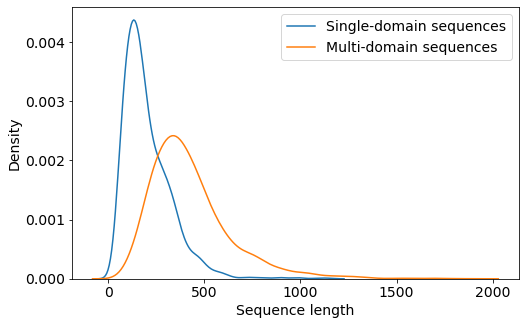

In [110]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

densities = {
    '1' : [],
    '2' : [],
    '3' : [],
    '4' : [],
    '5' : [],
    '> 5' : []
    }
n = 2

for chain, seq in chain_to_seq.items():
    no = number_of_domains(chain)
    if no >= n:
            densities['> 5'].append(len(seq))
    else:
        densities[str(no)].append(len(seq))

fig = plt.figure(figsize = (8, 5))
labels = []

for k, v in densities.items():
    sns.kdeplot(data=v, bw_adjust=1.2)
    labels.append(k)

# plt.legend(labels=[f"Sequences with {x} domains" for x in ['1', '2', '> 2']])
plt.legend(labels=['Single-domain sequences', 'Multi-domain sequences'])

plt.xlabel("Sequence length")    
# plt.title("Density plot for sequence length")
plt.show()
fig.savefig("../data/vis/density_plot.pdf", bbox_inches='tight')


In [100]:
with open('../data/cath/iid/chains_to_seq_iid.json', 'w') as fp:
    json.dump(chain_to_seq, fp)

In [54]:
len(chain_to_seq)

8497

In [101]:
unique_amino_acids = set()
for chain, seq in chain_to_seq.items():
    for i, aa in enumerate(seq):
        unique_amino_acids.add(aa)
        
print("Len:", len(unique_amino_acids))
print(unique_amino_acids)

Len: 21
{'S', 'K', 'W', 'V', 'A', 'P', 'M', 'Q', 'I', 'H', 'Y', 'G', 'D', 'R', 'N', 'C', 'E', 'L', 'F', 'X', 'T'}


In [5]:
# write every pdb code to a file to create mappings
with open("../data/cath/iid/list_of_final_chains.txt", "w") as f:
	for chain in list(set([x[:4] for x in chains_to_seq_iid.keys()])):
		f.write(chain + '\n')

In [113]:
with open('../data/cath/iid/chains_to_seq_iid.json') as json_file:
    chains_to_seq_iid = json.load(json_file)
len(chains_to_seq_iid)

8497

In [115]:
chains_to_seq_iid_lengths = [len(x) for x in chains_to_seq_iid.values()]

In [118]:
sorted(chains_to_seq_iid_lengths)

[40,
 40,
 40,
 40,
 40,
 40,
 41,
 41,
 41,
 42,
 42,
 42,
 43,
 43,
 43,
 44,
 44,
 44,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 53,
 54,
 54,
 54,
 54,
 54,
 55,
 55,
 55,
 55,
 55,
 55,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 57,
 57,
 57,
 57,
 57,
 58,
 58,
 58,
 58,
 59,
 59,
 59,
 59,
 59,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 65,
 65,
 65,
